#### importing all neccessary lib and read the data file

In [160]:
%pwd

'C:\\Users\\User\\python_new'

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st #skew,kurtosis,iqr
import seaborn as sns # boxplot
df=pd.read_csv('adult1.data')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


### check for the null values

In [121]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

### check the percentage of null value

In [122]:
round(100*((df.isnull().sum())/len(df)))

age               0.0
workclass         6.0
fnlwgt            0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        6.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    2.0
salary            0.0
dtype: float64

## replace all null values with front_fill

In [123]:
df['workclass'].fillna(method='ffill',inplace=True)

In [124]:
df['occupation'].fillna(method='ffill',inplace=True)

In [125]:
df['native-country'].fillna(method='ffill',inplace=True)

### check again whether ther is null value

In [126]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

##### describe the data which as numeric data

In [127]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


#### finding the iqr with for-loop

In [128]:
li=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
for i in li:
    print(st.iqr(df[i]))

20.0
119223.0
3.0
0.0
0.0
5.0


###### find iqr for indivisual

In [129]:
st.iqr(df['age'])

20.0

In [130]:
st.iqr(df['fnlwgt'])

119223.0

In [131]:
st.iqr(df['education-num'])

3.0

In [132]:
st.iqr(df['capital-gain'])

0.0

In [133]:
st.iqr(df['capital-loss'])

0.0

In [134]:
st.iqr(df['hours-per-week'])

5.0

#### finding the skew with for-loop

In [135]:
li=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
for i in li:
    print(st.skew(df[i]))

0.5587118988154982
1.4469055818253151
-0.31161553498633193
11.953139157554617
4.594337190555792
0.2276253044722967


###### find skew for indivisual

In [136]:
st.skew(df['age'])

0.5587118988154982

In [137]:
st.skew(df['fnlwgt'])

1.4469055818253151

In [138]:
st.skew(df['education-num'])

-0.31161553498633193

In [139]:
st.skew(df['capital-gain'])

11.953139157554617

In [140]:
st.skew(df['capital-loss'])

4.594337190555792

In [141]:
st.skew(df['hours-per-week'])

0.2276253044722967

#### finding the kurtosis with for-loop

In [142]:
li=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
for i in li:
    print(st.kurtosis(df[i]))

-0.16637097336607676
6.217800879833781
0.6232450120619433
154.77106994557127
20.37271576810563
2.9158724449065723


###### find kurtosis for indivisual

In [143]:
st.kurtosis(df['age'])

-0.16637097336607676

In [144]:
st.kurtosis(df['fnlwgt'])

6.217800879833781

In [145]:
st.kurtosis(df['education-num'])

0.6232450120619433

In [146]:
st.kurtosis(df['capital-gain'])

154.77106994557127

In [147]:
st.kurtosis(df['capital-loss'])

20.37271576810563

In [148]:
st.kurtosis(df['hours-per-week'])

2.9158724449065723

### since the skew of captial-gain and captial-loss and kurtosis of fnl is not with in the range it is 'not normally distributed' so we drop the column

In [149]:
df.drop('capital-gain',axis=1,inplace=True)

In [150]:
df.drop('capital-loss',axis=1,inplace=True)


In [151]:
df.drop('fnlwgt',axis=1,inplace=True)

In [152]:
df

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
5,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
6,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
7,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
8,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K
9,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,>50K


### make a box plot of rest of the column

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


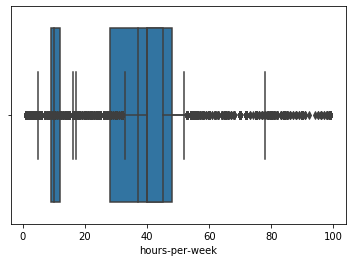

In [153]:
li=['age','education-num','hours-per-week']
for i in li:
    print(sns.boxplot(df[i]))

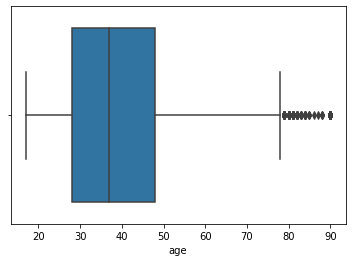

In [154]:
sns.boxplot(df['age'])

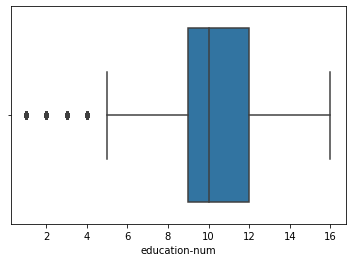

In [155]:
sns.boxplot(df['education-num'])

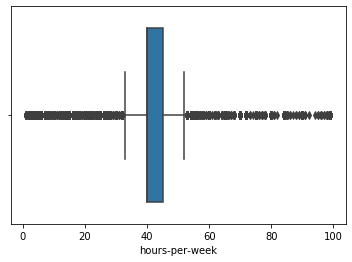

In [156]:
sns.boxplot(df['hours-per-week'])

In [157]:
df.describe()

,age,education-num,hours-per-week
count,32560.000000,32560.000000,32560.000000
mean,38.581634,10.080590,40.437469
std,13.640642,2.572709,12.347618
min,17.000000,1.000000,1.000000
25%,28.000000,9.000000,40.000000
50%,37.000000,10.000000,40.000000
75%,48.000000,12.000000,45.000000
max,90.000000,16.000000,99.000000
